In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [79]:
np.set_printoptions(suppress=True)

In [2]:
data = loadmat('ex4data1.mat')

In [5]:
X = data['X']
y = data['y']
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


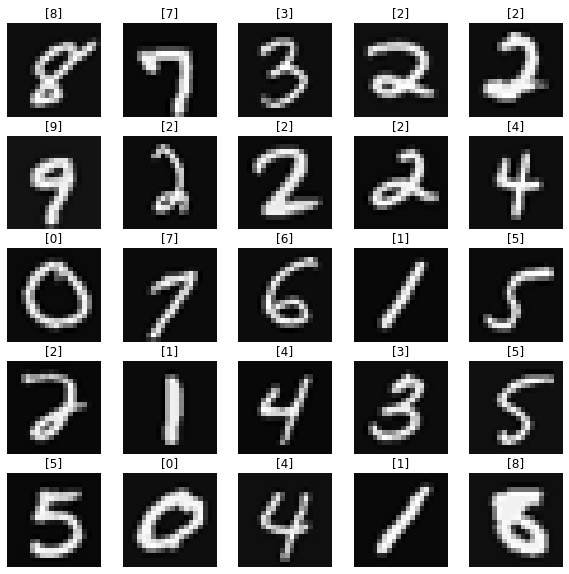

In [10]:
m = len(X)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    idx = np.random.randint(0, m)
    plt.imshow(X[idx].reshape(20, 20).T, cmap='gray')
    plt.axis('off')
    plt.title(y[idx] % 10)

In [12]:
weights = loadmat('ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print('Theta1 shape:', Theta1.shape)
print('Theta2 shape:', Theta2.shape)

Theta1 shape: (25, 401)
Theta2 shape: (10, 26)


In [13]:
m

5000

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [73]:
def forward(X, theta1, theta2):
    m = len(X)
    in_ = np.concatenate((np.ones((m, 1)), X), axis=1)
    in_ = in_.dot(theta1.T)
    in_ = sigmoid(in_)
    in_ = np.concatenate((np.ones((m, 1)), in_), axis=1)
    in_ = in_.dot(theta2.T)
    in_ = sigmoid(in_)
    return in_

In [74]:
output_size = 10

In [75]:
out = forward(X, Theta1, Theta2)

In [87]:
out[0]

array([0.00011266, 0.00174128, 0.00252697, 0.0000184 , 0.00936264,
       0.0039927 , 0.00551518, 0.00040147, 0.00648072, 0.99573401])

In [ ]:
loss = (-1/m) * np.sum()

In [100]:
-1/m * (Y * np.log(out) + (1 - Y) * np.log(1 - out)).sum()

0.2876291651613189

In [143]:
def loss(X, theta1, theta2, y, lamda=0):
    m = len(X)
    output_size = int(y.max())
    Y = np.zeros((m, output_size), np.int)
    Y[range(m), ((y - 1) % 10).ravel()] = 1
    out = forward(X, theta1, theta2)
    J = -1/m * (Y * np.log(out) + (1 - Y) * np.log(1 - out)).sum() + lamda/(2*m) * ((theta1[:,1:] ** 2).sum() + (theta2[:,1:] ** 2).sum())
    return J

In [147]:
def loss_and_grad(X, theta1, theta2, y, lamda=0):
    # theta1 25 x 401
    # theta2 10 x 26
    m = len(X)
    output_size = int(y.max())
    Y = np.zeros((m, output_size), np.int)
    Y[range(m), ((y - 1) % 10).ravel()] = 1
    a1b = np.concatenate((np.ones((m, 1)), X), axis=1) # M x 401
    z2 = a1b.dot(theta1.T) # M x 25
    a2 = sigmoid(z2) # M x 25
    a2b = np.concatenate((np.ones((m, 1)), a2), axis=1) # M x 26
    z3 = a2b.dot(theta2.T) # M x 10
    a3 = sigmoid(z3) # M x 10
    J = -1/m * (Y * np.log(a3) + (1 - Y) * np.log(1 - a3)).sum() + lamda/(2*m) * ((theta1[:,1:] ** 2).sum() + (theta2[:,1:] ** 2).sum())
    
    delta_a3 = a3 - Y # M x 10
    delta_a2 = delta_a3.dot(theta2)[:, 1:] * (sigmoid(z2) * (1 - sigmoid(z2))) # M x 25
    grad_2 = 1/m * delta_a3.T.dot(a2b)
    grad_1 = 1/m * delta_a2.T.dot(a1b)
    grad_2[:,1:] += lamda/m * theta2[:,1:]
    grad_1[:,1:] += lamda/m * theta1[:,1:]
    return J, grad_1, grad_2

In [153]:
def predict(X, theta1, theta2):
    out = forward(X, theta1, theta2)
    return (np.argmax(out, axis=1) + 1) % 10

In [159]:
#### Training
theta1 = np.random.rand(25, 401)
theta2 = np.random.rand(10, 26)
i = 0
lr = 1e-3
while True:
    loss, grad1, grad2 = loss_and_grad(X, theta1, theta2, y)
    
    theta1 -= lr * grad1
    theta2 -= lr * grad2
    pred = predict(X, theta1, theta2)
    acc = pred == (y.ravel() % 10)
    
    if i % 100 == 0:
        print('Iter: {}, loss: {:.4f}'.format(i, loss))
        print('Accuracy: {:.4f}'.format(acc.sum() / m))
    i += 1
    if i == 1000:
        break

Iter: 0, loss: 118.7140
Accuracy: 0.1000
Iter: 100, loss: 97.6551
Accuracy: 0.1000


KeyboardInterrupt: 

In [144]:
print('Expected loss without regularization: 0.287629')
print(loss(X, Theta1, Theta2, y, 0))
print('Expected loss with regularization term = 1: 0.383770')
print(loss(X, Theta1, Theta2, y, 1))

Expected loss without regularization: 0.287629
0.2876291651613189
Expected loss with regularization term = 1: 0.383770
0.38376985909092365


In [118]:
np.log(out[np.where(Y==1)]).sum()
(Y * np.log(out) + (1 - Y) * np.log(1 - out)).sum()
(Y * np.log(out)).sum()

-812.0036117235874